In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import copy

In [90]:
data = pd.read_csv("project_catalog.csv")

*Objective
Here, we will try to answer some interesting questions, such as:
Human body site showing most microbial diversity:
The most common genus of microorganism found in the human body
Most ubiquitous microbe in the human body*

In [91]:
data.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HMP ID                   2915 non-null   int64 
 1   GOLD ID                  1783 non-null   object
 2   Organism Name            2915 non-null   object
 3   Domain                   2712 non-null   object
 4   NCBI Superkingdom        2751 non-null   object
 5   HMP Isolation Body Site  2915 non-null   object
 6   Project Status           2915 non-null   object
 7   Current Finishing Level  1579 non-null   object
 8   NCBI Submission Status   2915 non-null   object
 9   NCBI Project ID          2915 non-null   int64 
 10  Genbank ID               1579 non-null   object
 11  Gene Count               2915 non-null   int64 
 12  IMG/HMP ID               2915 non-null   int64 
 13  HOMD ID                  397 non-null    object
 14  Sequencing Center        2911 non-null  

Text(0, 0.5, 'number of identified microbes')

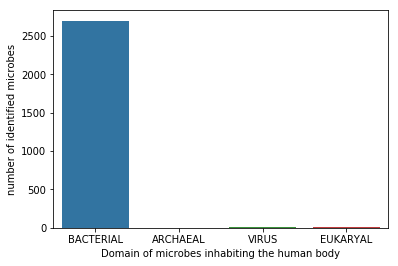

In [93]:
sns.countplot(data=data, x="Domain")
plt.xlabel("Domain of microbes inhabiting the human body")
plt.ylabel("number of identified microbes")

*The human microbiome is dominated by Bacteria*

Text(0, 0.5, 'number of identified microbes')

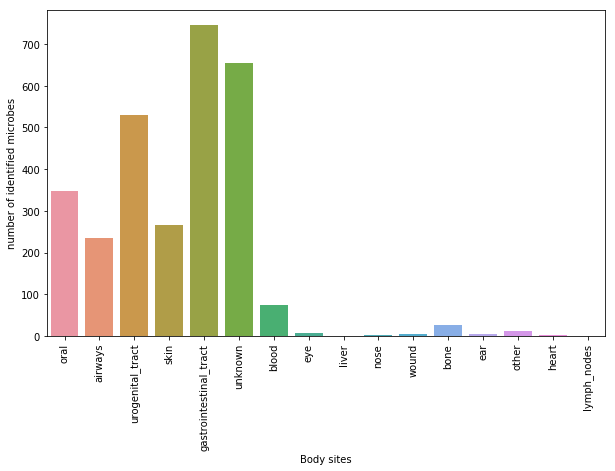

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="HMP Isolation Body Site") 
plt.xticks(rotation=90)

plt.xlabel("Body sites")
plt.ylabel("number of identified microbes")

*most diversity shown in the gastrointestinal tract*

In [95]:
def get_genus(row):
    genus = row.split(" ")[0]
    return genus

In [96]:
data["Genus"] = data["Organism Name"].apply(get_genus)

Text(0, 0.5, 'number of identified microbes')

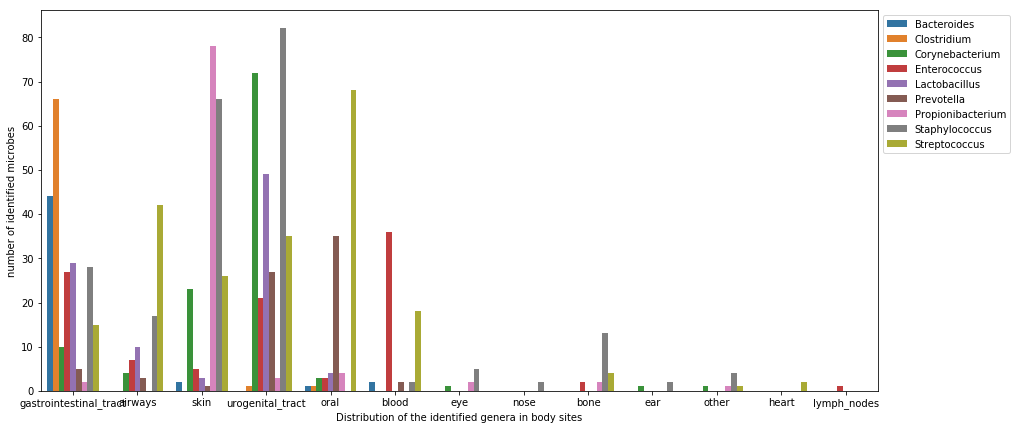

In [109]:
plt.figure(figsize=(15,7))
values = data.Genus.value_counts()   
most_abudant_genus_df = data[data.Genus.isin(values.index[values.gt(70)])]
most_abudant_genus_df = most_abudant_genus_df[most_abudant_genus_df["HMP Isolation Body Site"] != "unknown"]    

sns.countplot(data=most_abudant_genus_df, x="HMP Isolation Body Site", hue="Genus")
plt.legend(bbox_to_anchor=(1, 1)) 
plt.xlabel("Distribution of the identified genera in body sites")
plt.ylabel("number of identified microbes")


*The graph shows the most abundant microbes by body site*

In [116]:
data.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",Abiotrophia
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",Achromobacter
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,Achromobacter
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",Acinetobacter
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,Acinetobacter


Text(0.5, 1.0, 'Diversity of eukaryotes at different body sites')

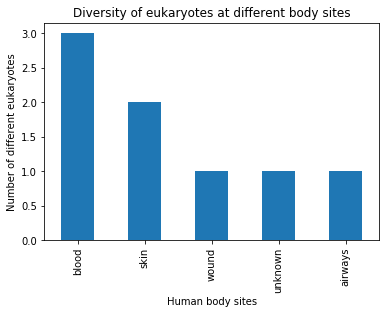

In [120]:
euk=data.loc[data['Domain']=='EUKARYAL']
euk['HMP Isolation Body Site'].unique()
euk['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different eukaryotes')
plt.xlabel('Human body sites')
plt.title('Diversity of eukaryotes at different body sites')

*Eukaryotes are presented in 5 body sites where the highet number is in the blood*

                   HMP Isolation Body Site
Genus                                     
Staphylococcus                          11
Streptococcus                           10
Enterococcus                             9
Corynebacterium                          9
Actinomyces                              9
Propionibacterium                        8
Haemophilus                              8
Prevotella                               7
Fusobacterium                            7
Bifidobacterium                          6
Klebsiella                               6
Lactobacillus                            6
Porphyromonas                            6
Pseudomonas                              6
Neisseria                                6
Rothia                                   5
Bacteroides                              5
Gemella                                  5


Text(0.5, 1.0, 'Number of habitats for different microorganisms')

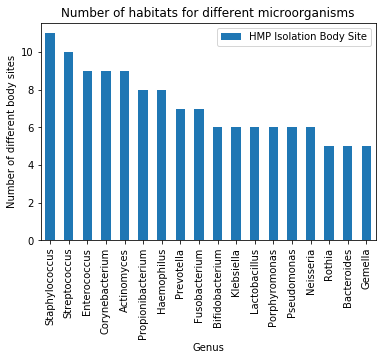

In [121]:
z=data.groupby('Genus')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)
y=pd.DataFrame(z)
w=y[y['HMP Isolation Body Site']>4]
print(w)
w.plot(kind='bar')
plt.ylabel('Number of different body sites')
plt.title('Number of habitats for different microorganisms')

*the most ubiquitous organism found in this analysis is Staphylococcus, with 11 habitats- urogenital_tract, skin, airways, unknown, gastrointestinal_tract, nose, blood, bone, eye, ear, other*

In [122]:
viruses= data[data['NCBI Superkingdom'] =='Viruses']
viruses['Organism Name']

532            Actinomyces phage vB_Ana_GK1
2852    Pseudomonas phage F_HA0480sp/Pa1651
2853                Pseudomonas phage JBD18
2854                Pseudomonas phage JBD25
2855                Pseudomonas phage JBD26
2856                Pseudomonas phage JBD67
Name: Organism Name, dtype: object

In [123]:
archaea = data[data['NCBI Superkingdom']=='Archaea']
archaea['Organism Name']

302    Methanobrevibacter smithii DSM 2374
303    Methanobrevibacter smithii DSM 2375
Name: Organism Name, dtype: object

In [129]:
max(data['Gene Count'])  
data[data['Gene Count']==8490]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus
679,1211,Gi10716,Streptomyces sp. HGB0020,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,72491,AGER00000000,8490,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-789,Streptomyces


*Streptomyces sp. HGB0020 has the highest number og genes*

*In this kernel we have performed EDA of the Human Microbiome dataset.
Gastrointestine shows most diversity of microbes
Streptomyces sp. HGB0020 shows the maximum gene count in human,
Streptococcus is most common genus while Staphylococcus is most ubiquitous in humans*